In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from ucimlrepo import fetch_ucirepo, list_available_datasets #Import ucidatasets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from matplotlib import pyplot as plt

C:\Users\Drewn\AppData\Local\Temp\ipykernel_29428\2477987106.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2)

In [4]:
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables)

X = pd.get_dummies(X)

X.head()

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Accuracy : ",
        accuracy_score(y_test, y_pred)*100)
print("Report : \n",
        classification_report(y_test, y_pred))

Confusion Matrix: 
 [[4457 2088  587  318]
 [2004 1246  298  154]
 [ 585  273  975  481]
 [ 312  143  490  242]]
Accuracy: 0.4722582406333174
Accuracy :  47.22582406333174
Report : 
               precision    recall  f1-score   support

       <=50K       0.61      0.60      0.60      7450
      <=50K.       0.33      0.34      0.33      3702
        >50K       0.41      0.42      0.42      2314
       >50K.       0.20      0.20      0.20      1187

    accuracy                           0.47     14653
   macro avg       0.39      0.39      0.39     14653
weighted avg       0.47      0.47      0.47     14653



In [ ]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = X.columns.tolist(), 
           class_names= ['acc', 'good', 'unacc', 'vgood' ],
           filled = True)

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=14)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Accuracy : ",
        accuracy_score(y_test, y_pred)*100)
print("Report : \n",
        classification_report(y_test, y_pred))

Confusion Matrix: 
 [[6613  348  455   34]
 [3166  294  217   25]
 [ 846   58 1256  154]
 [ 438   35  642   72]]
Accuracy: 0.5620009554357469
Accuracy :  56.20009554357469
Report : 
               precision    recall  f1-score   support

       <=50K       0.60      0.89      0.71      7450
      <=50K.       0.40      0.08      0.13      3702
        >50K       0.49      0.54      0.51      2314
       >50K.       0.25      0.06      0.10      1187

    accuracy                           0.56     14653
   macro avg       0.43      0.39      0.36     14653
weighted avg       0.50      0.56      0.49     14653



<module 'matplotlib.pyplot' from 'C:\\Users\\Drewn\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

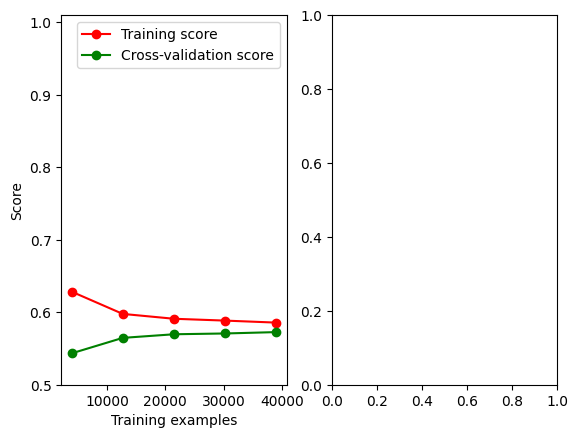

In [11]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
ccp_alphas= clf.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
ccp_alphas
clf_dts = []#created an array that we put decision tree into

for ccp_alpha in ccp_alphas :
    clf=DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clf_dts.append(clf)
train_scores= [ clf.score(X_train, y_train ) for  clf in clf_dts]
test_scores = [clf.score(X_test, y_test) for clf in clf_dts]
node_counts = [clf.tree_.node_count for clf in clf_dts]
depth = [clf.tree_.max_depth for clf in clf_dts]
fig, ax = plt.subplots(2, 1, figsize =(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

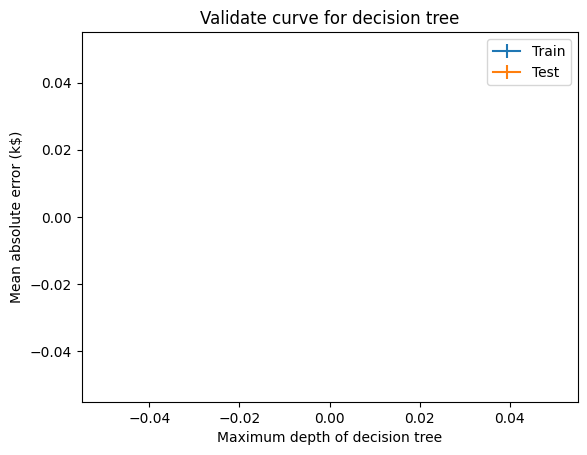

In [44]:
max_depth = np.array([1, 5, 10, 15, 20, 25])
disp = ValidationCurveDisplay.from_estimator(
    clf,
    X,
    y,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="Maximum depth of decision tree",
    ylabel="Mean absolute error (k$)",
    title="Validate curve for decision tree",
)